In [2]:
using CSV, DataFrames
using DelimitedFiles  # To read a csv with multiple whitespaces
using GLM
using Plots

### 3.6.2 Simple Linear Regression

In [3]:
# Loading the dataset
Boston = DataFrame(readdlm("C:\\Users\\charl\\Desktop\\VS_Code\\2024\\ISL_2024\\Datasets\\Boston_Housing.csv"), :auto)
first(Boston, 3)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


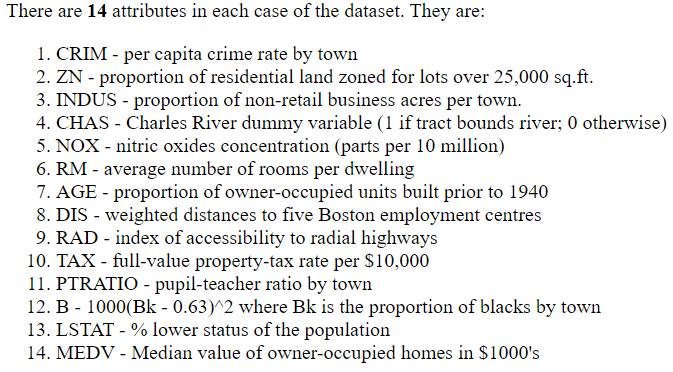

In [4]:
# Renaming the columns
col_names = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black",
"lstat", "medv"]
rename!(Boston, col_names)
show(first(Boston, 5), allcols=true)

5×14 DataFrame
 Row │ crim     zn       indus    chas     nox      rm       age      dis      rad      tax      ptratio  black    lstat    medv    
     │ Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64 
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 0.00632     18.0     2.31      0.0    0.538    6.575     65.2   4.09        1.0    296.0     15.3   396.9      4.98     24.0
   2 │ 0.02731      0.0     7.07      0.0    0.469    6.421     78.9   4.9671      2.0    242.0     17.8   396.9      9.14     21.6
   3 │ 0.02729      0.0     7.07      0.0    0.469    7.185     61.1   4.9671      2.0    242.0     17.8   392.83     4.03     34.7
   4 │ 0.03237      0.0     2.18      0.0    0.458    6.998     45.8   6.0622      3.0    222.0     18.7   394.63     2.94     33.4
   5 │ 0.06905      0.0     2.18      0.0    0.458    7.14

In [5]:
X = DataFrame(Dict("intercept"=> ones(size(Boston)[1]), "lstat"=> Boston[!, :lstat]))
X[1:4, :]

Row,intercept,lstat
,Float64,Float64
1,1.0,4.98
2,1.0,9.14
3,1.0,4.03
4,1.0,2.94


In [6]:
y = Boston[!, :medv];

In [7]:
data = DataFrame()
data.X = X[!, :lstat]
data.y = y
show(first(data, 3), allcols=true)

3×2 DataFrame
 Row │ X        y       
     │ Float64  Float64 
─────┼──────────────────
   1 │    4.98     24.0
   2 │    9.14     21.6
   3 │    4.03     34.7

In [8]:
# using GLM

model = lm(@formula(y ~ X), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  34.5538     0.562627    61.42    <1e-99   33.4485   35.6592
X            -0.950049   0.0387334  -24.53    <1e-87   -1.02615  -0.873951
──────────────────────────────────────────────────────────────────────────

In [9]:
X

Row,intercept,lstat
,Float64,Float64
1,1.0,4.98
2,1.0,9.14
3,1.0,4.03
4,1.0,2.94
5,1.0,5.33
6,1.0,5.21
7,1.0,12.43
8,1.0,19.15
9,1.0,29.93


In [21]:
Array(X)\y

2-element Vector{Float64}:
 34.55384087938309
 -0.9500493537579905

In [11]:
fitted(model)

506-element Vector{Float64}:
 29.822595097668263
 25.87038978603504
 30.72514198373835
 31.760695779334554
 29.490077823852967
 29.604083746303928
 22.744727412171272
 16.360395754917608
  6.118863721406523
 18.307996930121476
  ⋮
 21.158144991395435
 22.279203228829857
 20.20809563763745
 20.939633640031097
 25.36686362854331
 25.92739274726052
 29.19556252418799
 28.397521067031285
 27.067451971770105

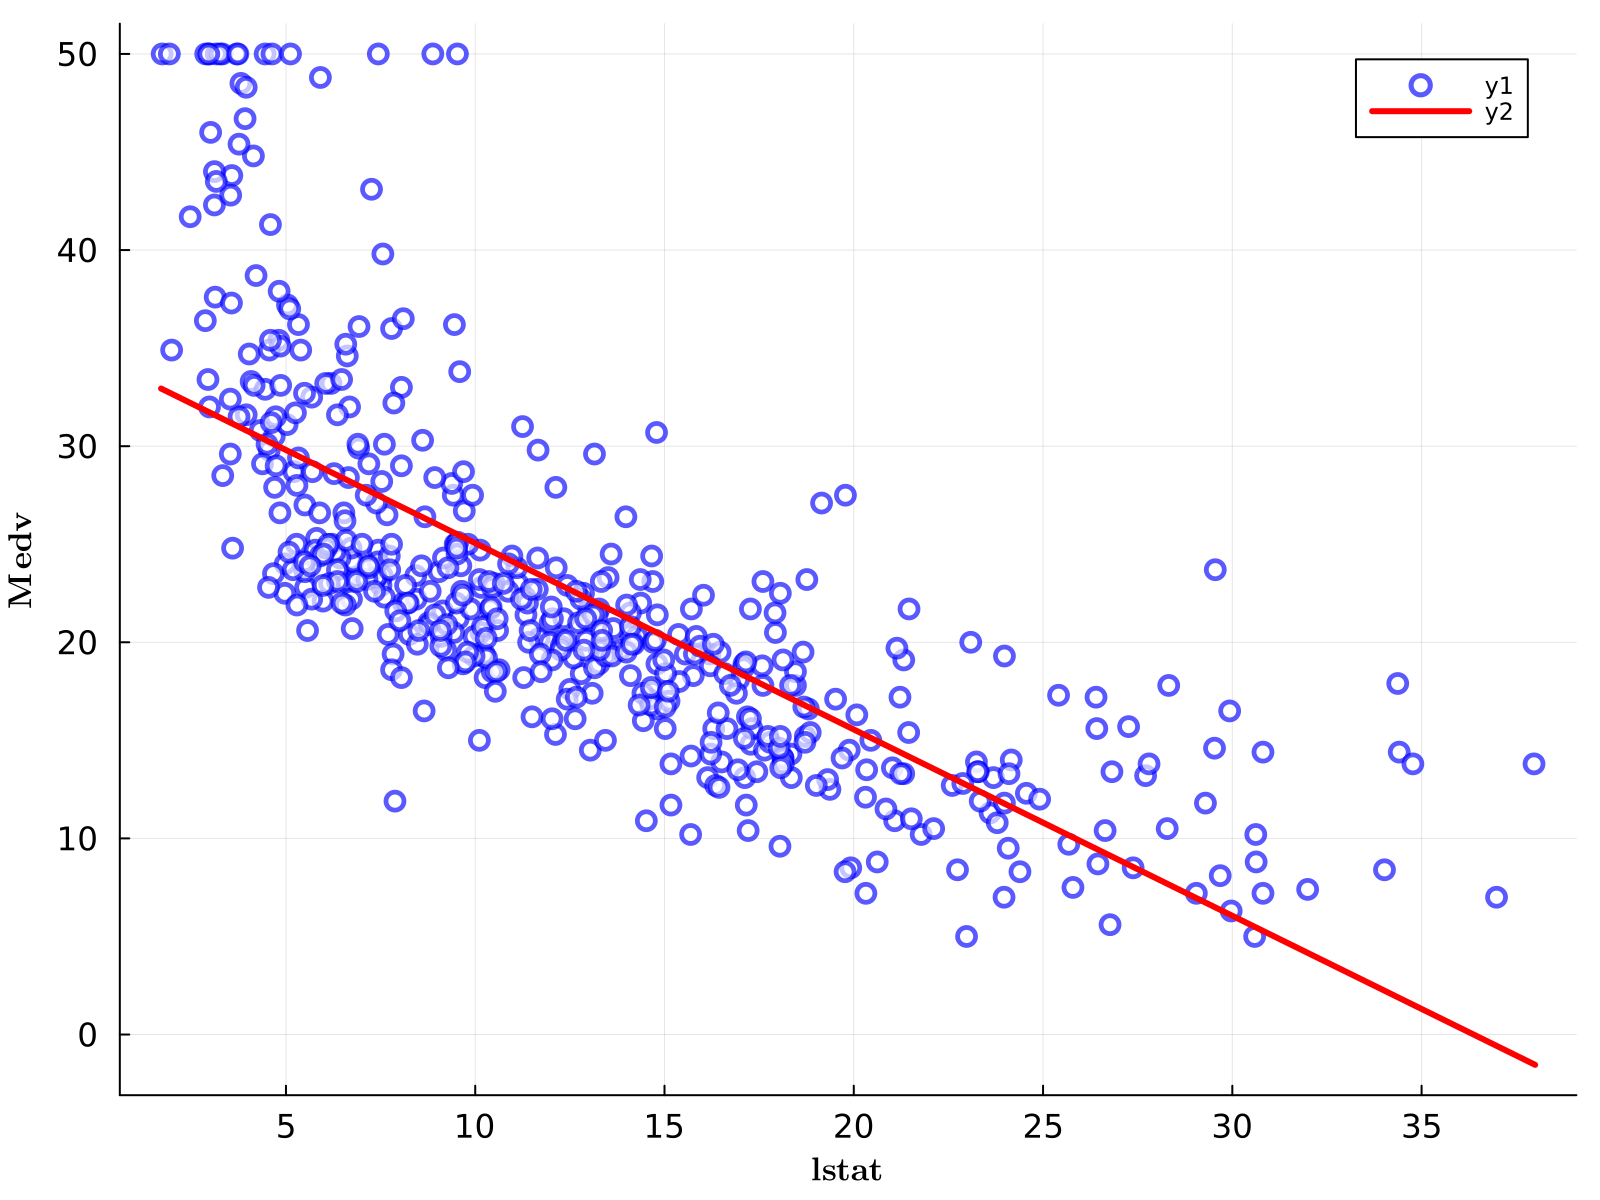

In [12]:
using Plots
using LaTeXStrings

scatter(data.X, data.y, size=(800, 600), dpi=200, markersize=5, c=:white, markerstrokecolor="blue", 
markerstrokewidth=2, alpha=0.65, xlabel=L"\mathbf{lstat}", ylabel=L"\mathbf{Medv}", 
xtickfontsize=11, ytickfontsize=11)
values = LinRange(1.7,38,50)
y_hat = @. 34.5538 - 0.95*values
plot!(values, y_hat, color=:red, linewidth=3)

In [13]:
coeftable(model)

|             |     Coef. | Std. Error |      t | Pr(>|t|) | Lower 95% | Upper 95% |
|:------------|----------:|-----------:|-------:|:---------|:----------|----------:|
| (Intercept) | 34.5538   |  0.562627  |  61.42 |   <1e-99 |  33.4485  | 35.6592 |
| X           | -0.950049 |  0.0387334 | -24.53 |   <1e-87 |  -1.02615 | -0.873951 |

In [14]:
X_values = DataFrame([data.X], [:X]) ;

In [15]:
X_val = DataFrame(X= [5, 10, 15])

Row,X
,Int64
1,5
2,10
3,15


In [16]:
pred = predict(model, X_val)

3-element Vector{Union{Missing, Float64}}:
 29.803594110593103
 25.053347341803175
 20.303100573013246

In [24]:
pred = predict(model, X_val, interval=:confidence, level=0.95)

Row,prediction,lower,upper
,Float64?,Float64?,Float64?
1,29.8036,29.0074,30.5998
2,25.0533,24.4741,25.6326
3,20.3031,19.7316,20.8746


In [25]:
pred = predict(model, X_val, interval=:prediction, level=0.95)

Row,prediction,lower,upper
,Float64?,Float64?,Float64?
1,29.8036,17.5657,42.0415
2,25.0533,12.8276,37.2791
3,20.3031,8.07774,32.5285


In [26]:
@userplot Myplot
@recipe function h(object::Myplot)
    seriestype := :scatter
    seriescolor := :white
    markersize := 5
    markerstrokecolor --> :blue
    markerstrokewidth --> 2
    alpha --> 0.7
    xtickfont --> font(10)
    ytickfont --> font(10)
    size --> (800, 600)
    dpi --> 200
    object.args
end

### Scatter plot

In [27]:
using LaTeXStrings

function abline(p, b, m)
    "Add a line with slope m and intercept b to p"
    xlim = collect(xlims(p))
    ylim = collect((m * xlim[1] + b, m * xlim[2] + b))
    b = round(b, digits=2)
    m = round(m, digits=2)
    plot!(xlim, ylim, c=:red, linewidth = 2, label= L"y = %$b %$m x")
end ;

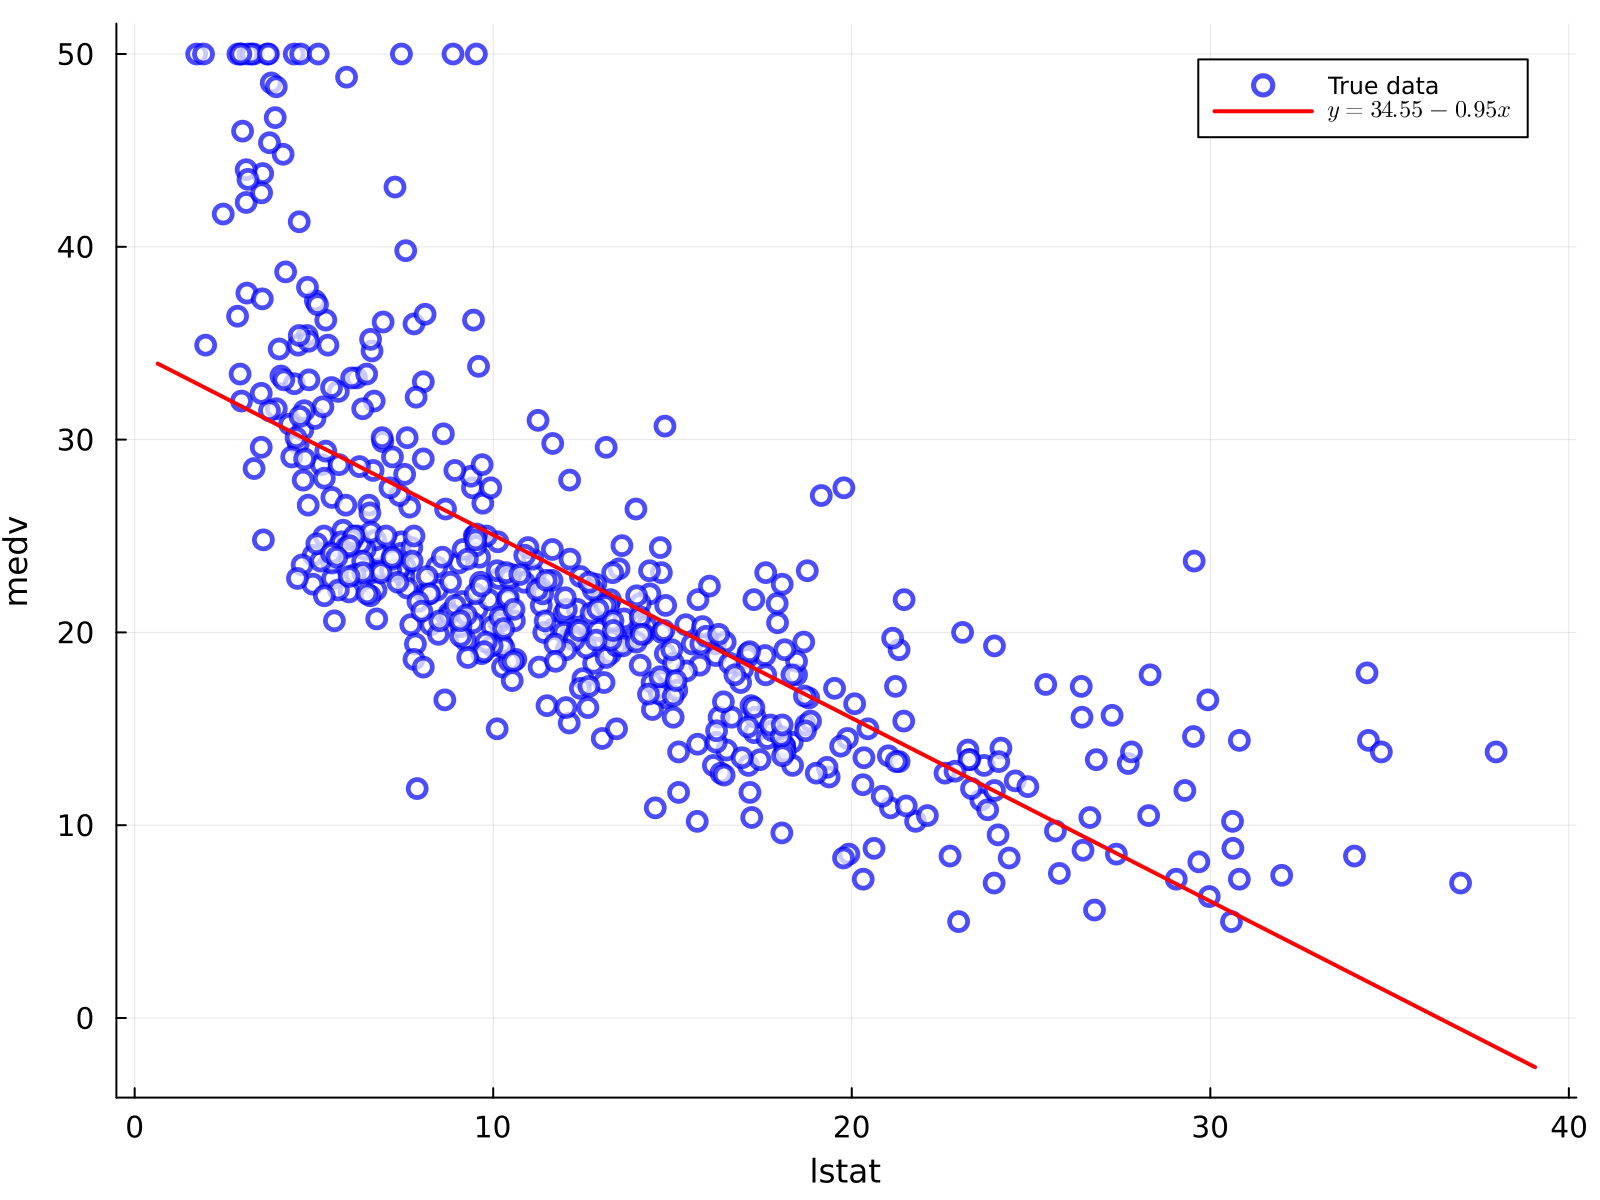

In [37]:
p = myplot(Boston.:lstat, Boston.:medv, xlabel="lstat", ylabel="medv", label="True data")
abline(p, coef(model)[1], coef(model)[2])

In [39]:
# savefig("medv-lstat.png")

In [53]:
fitted(model) ;

In [54]:
residuals(model) ;

### Residuals plot

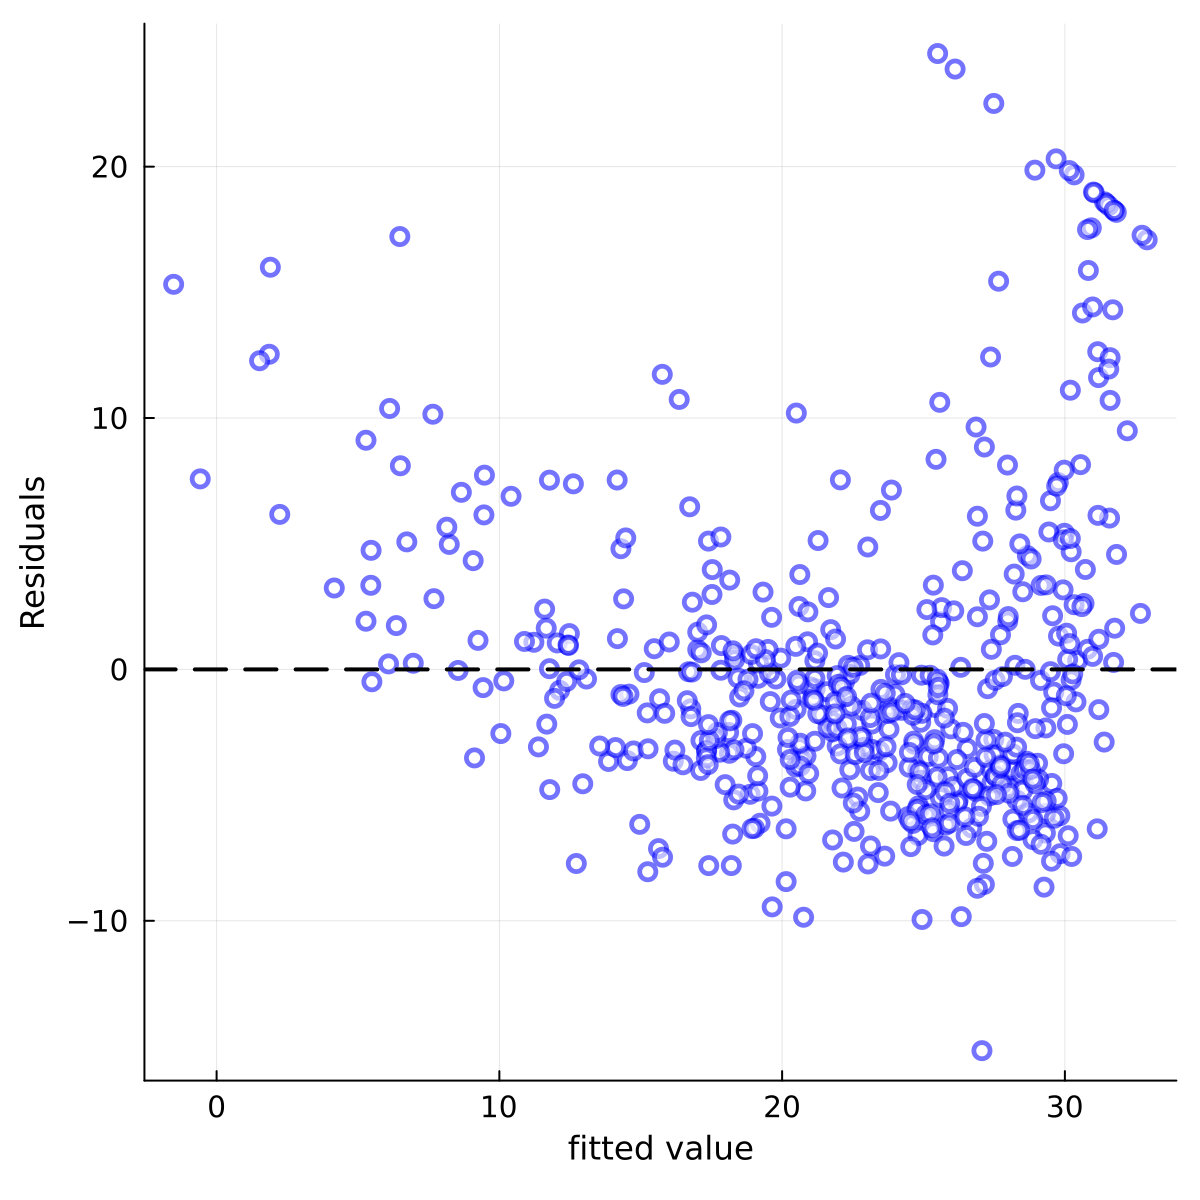

In [61]:
scatter(fitted(model), residuals(model), legend=false, c=:white, markersize=4.5, markerstrokecolor=:blue, 
markerstrokewidth=2, alpha=0.55, size=(600, 600), xlabel="fitted value", ylabel="Residuals", dpi=200, xtickfont=10,
ytickfont=10)
hline!([0], c=:black, linestyle=:dash, linewidth=2)

In [63]:
# savefig("Residuals.png")

### Leverage plot

### Hat Matrix

In [71]:
using LinearAlgebra

E = hcat(ones(506), Boston.:lstat) ;
Lev = diag(E*inv((E'*E))*E') ;

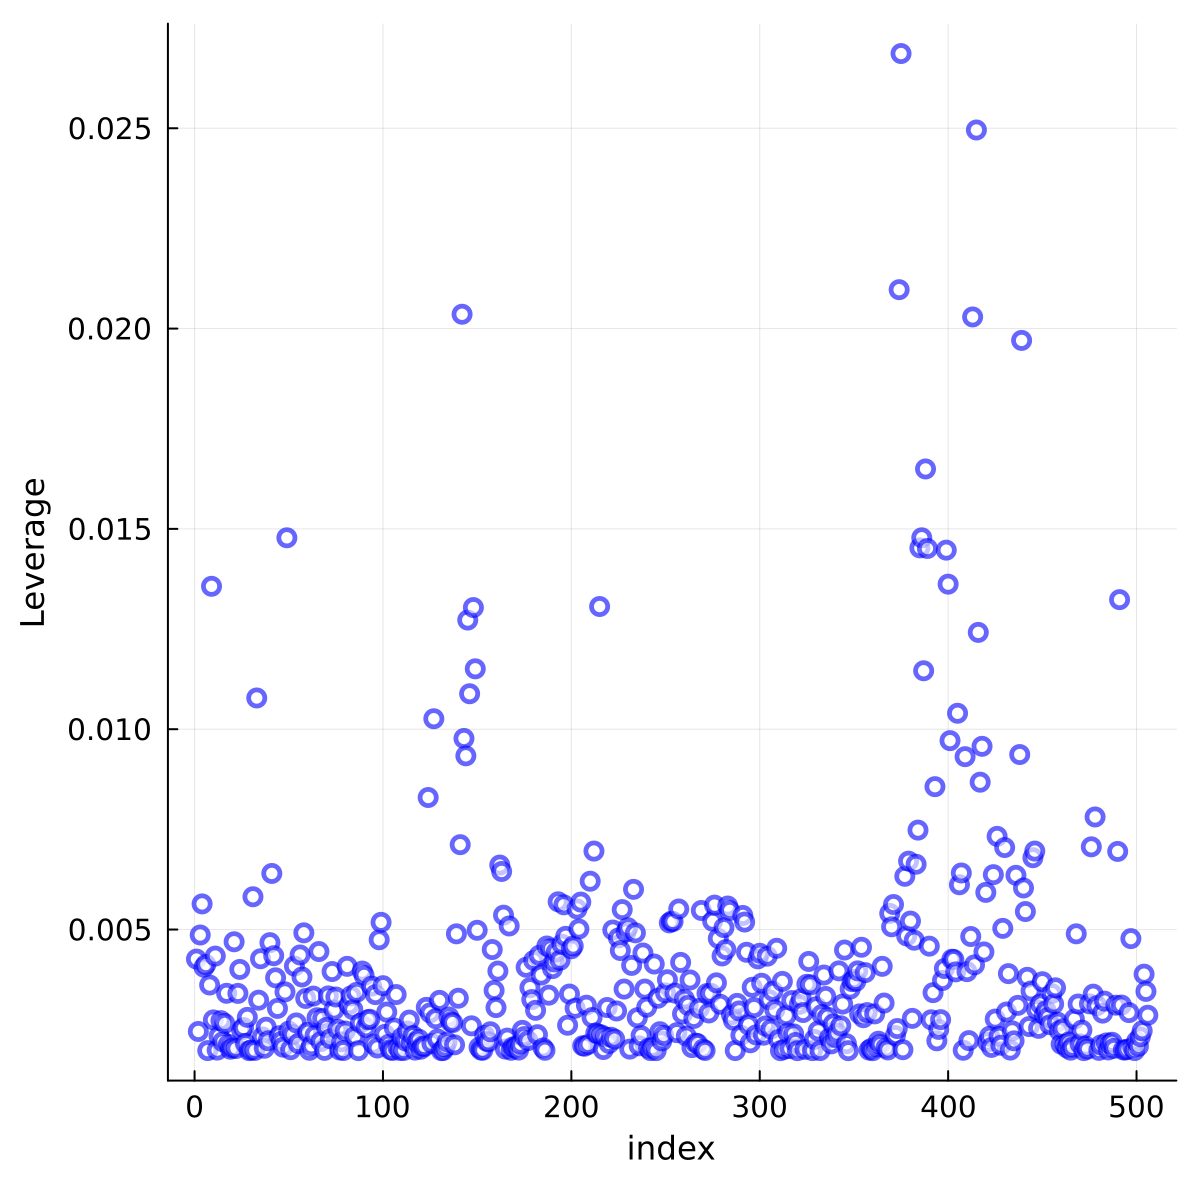

In [79]:
i = collect(1:506)
scatter(i, Lev, legend=false, c=:white, markersize=4.5, markerstrokecolor=:blue, 
markerstrokewidth=2, alpha=0.6, size=(600, 600), xlabel="index", ylabel="Leverage", dpi=200,
xtickfont=10, ytickfont=10)

In [78]:
# savefig("Leverage.png")

"c:\\Users\\charl\\Desktop\\VS_Code\\2024\\ISL_2024\\CH-3\\Leverage.png"

In [81]:
findmax(Lev)

(0.026865166510283436, 375)